In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

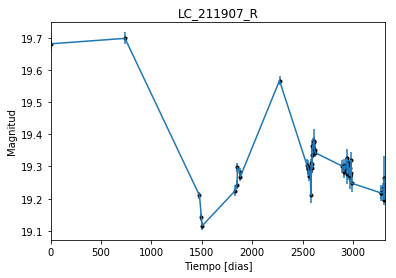

In [2]:
data = np.genfromtxt('LC_211907_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_211907_R')
plt.savefig("LC_211907_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

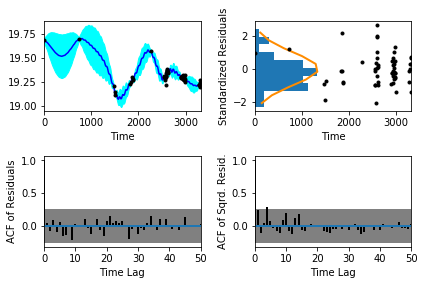

In [5]:
sample.assess_fit()

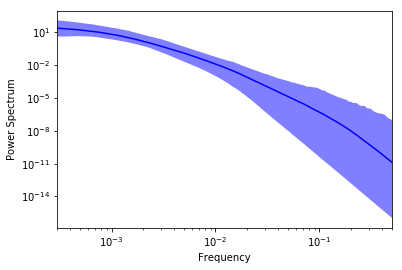

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

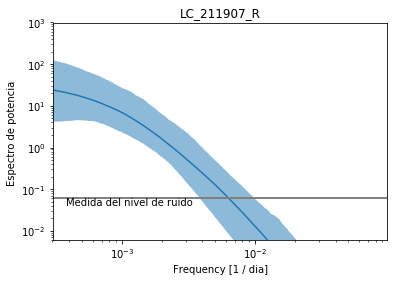

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_211907_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_211907_R')

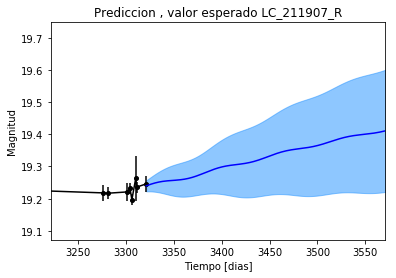

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_211907_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_211907_R')

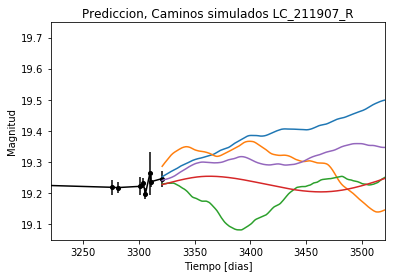

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_211907_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


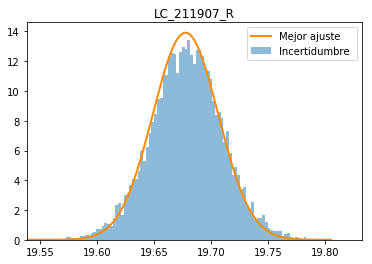

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_211907_R')
plt.savefig("Mejor_ajuste_LC_211907_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_211907_R')

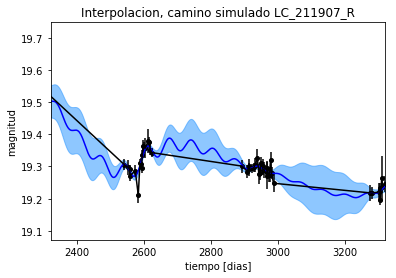

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_R')

Text(0.5,1,'Interpolacion, camino simulado LC_211907_R')

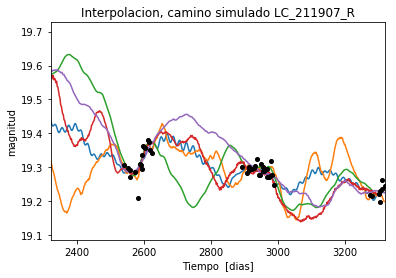

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 436.992954475
Median: 0.0172645371774
Standard deviation: 0.214691472042
68% credibility interval: [ 0.00140733  0.23332223]
95% credibility interval: [  4.04742978e-04   8.30324830e-01]
99% credibility interval: [  3.25748613e-04   9.72285626e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 320.697458511
Median: 0.00352527567567
Standard deviation: 0.0895888770951
68% credibility interval: [ 0.00049829  0.03812314]
95% credibility interval: [ 0.00032477  0.26554765]
99% credibility interval: [  3.05379905e-04   7.01697760e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 689.017952376
Median: 0.00780896577392
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1088.41373789
Median: 132.296113499
Standard deviation: 1.82677743157
68% credibility interval: [ 130.24759926  133.66035585]
95% credibility interval: [ 127.57354224  134.57160619]
99% credibility interval: [ 125.58684067  135.16804113]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 393.10767145
Median: 0.56010773799
Standard deviation: 2.0734899893
68% credibility interval: [ 0.05771317  3.55755462]
95% credibility interval: [ 0.01543415  7.05036063]
99% credibility interval: [  9.79212060e-03   9.90967160e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 427.43526121
Median: 0.592435994096
Standard deviation: 8.0634291274
68% credibility interval: [ 0.0308598   7.44228625]
95% credibility interval: [  4.603400

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1342.85551676
Median: 2.71011903763e-32
Standard deviation: 3.62314232201e+33
68% credibility interval: [  5.88696132e-59   3.74815853e-09]
95% credibility interval: [  2.52549471e-102   4.52410130e+002]
99% credibility interval: [  5.36383866e-114   9.54390517e+025]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2064.31754319
Median: 19.4242533265
Standard deviation: 0.119412134757
68% credibility interval: [ 19.32468906  19.53384278]
95% credibility interval: [ 19.20248095  19.6743899 ]
99% credibility interval: [ 19.07237021  19.81425878]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 747.608854741
Median: 0.0153114701311
Standard deviation: 0.235887848753
68% credibility interval: [ 0.          0.34692709]
95% credibility interval: [ 0.          0.86481268]
99% credibility interval: [ 0.          0.97621448]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 747.608854741
Median: 0.0153114701311
Standard deviation: 0.235887848753
68% credibility interval: [ 0.          0.34692709]
95% credibility interval: [ 0.          0.86481268]
99% credibility interval: [ 0.          0.97621448]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 734.083318921
Median: 0.0
Standard deviation: 0.000442366850572
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1088.41373789
Median: 132.296113499
Standard deviation: 1.82677743157
68% credibility interval: [ 130.24759926  133.66035585]
95% credibility interval: [ 127.57354224  134.57160619]
99% credibility interval: [ 125.58684067  135.16804113]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3374.00421923
Median: 0.050359740082
Standard deviation: 0.058355285105
68% credibility interval: [ 0.03014851  0.09514758]
95% credibility interval: [ 0.01964604  0.2107476 ]
99% credibility interval: [ 0.01615936  0.38829092]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2803.88018556
Median: 1.00841393741
Standard deviation: 0.170960185019
68% credibility interval: [ 0.85523424  1.18962122]
95% credibility interval: [ 0.73377876  1.40293189]
99% credibility interval: [ 0.66662652  1.57045903]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 860.045519479
Median: 0.000275838305866
Standard deviation: 0.0128171538469
68% credibility interval: [  7.88277848e-06   3.88705473e-03]
95% credibility interval: [  1.18810017e-07   2.10734188e-02]
99% credibility interval: [  6.94618684e-30   5.63270044e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 436.992954475
Median: (-0.108476286328-1.91860905864j)
Standard deviation: 2.00408501957
68% credibility interval: [-1.4660068+0.j         -0.0088425-0.60062685j]
95% credibility interval: [ -5.21708477e+00-1.58592094j  -2.54307513e-03-0.63470015j]
99% credibility interval: [ -6.10905076e+00+0.j          -2.04673890e-03-0.00192809j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 320.697458511
Median: (-0.0221499603291+0j)
Standard deviation: 1.58542139719
68% credibility interval: [-0.23953476+4.77175035j -0.00313086+0.j        ]
95% credibility interval: [-1.66848507+3.77112337j -0.00204057+0.j        ]
99% credibility interval: [ -4.40889705e+00+3.08054526j  -1.91875853e-03+0.j        ]
Posterior summary for paramet